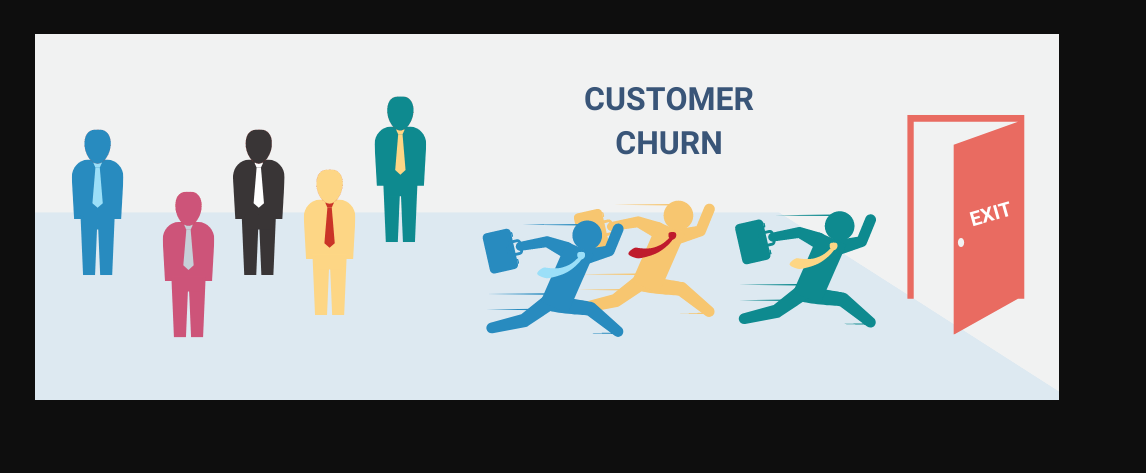

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcparams['figure.figsize'] = (6,8)
import os
import seaborn as sns

# PROBLEM STATEMENTS :
* we are tasked to create a churn prediction platform for the business
* Churn in a customer dataset refers to the phenomenon where customers stop doing business with a company or service.

In [4]:
# UNDERSTANDING THE DATASET 

In [5]:
data = pd.read_csv('Expresso_churn_dataset.csv')
data.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0


In [6]:
data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

- COLUMNS DESCRIPTION 


In [7]:
pd.read_csv('VariableDefinitions.csv')

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [9]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [10]:
# checking for skewness in the dataset
data.select_dtypes(include=["float","int"]).skew(skipna=True,axis=0) 

MONTANT            4.229726
FREQUENCE_RECH     2.111988
REVENUE            4.189002
ARPU_SEGMENT       4.189019
FREQUENCE          1.775081
DATA_VOLUME       36.256743
ON_NET             8.147928
ORANGE             8.054016
TIGO              12.899932
ZONE1             25.708893
ZONE2             30.885189
REGULARITY         0.247408
FREQ_TOP_PACK      4.112066
CHURN              1.600885
dtype: float64

- FINDINGS : 
    - Interpreting Each Feature's Skewness:
    - MONTANT (4.23): Highly positively skewed. The distribution has a long tail on the right.
    - FREQUENCE_RECH (2.11): Highly positively skewed. The data has a long right tail.
    - REVENUE (4.19): Highly positively skewed, similar to the "MONTANT" feature.
    - ARPU_SEGMENT (4.19): Highly positively skewed, indicating a right-skewed distribution.
    - FREQUENCE (1.78): Moderately positively skewed.
    - DATA_VOLUME (36.26): Extremely positively skewed, indicating a very long right tail. This feature has a significant skew that might need 
     addressing.
    - ON_NET (8.15): Highly positively skewed, with a rightward tail.
    - ORANGE (8.05): Highly positively skewed.
    - TIGO (12.90): Highly positively skewed, indicating a substantial right tail.
    - ZONE1 (25.71): Extremely positively skewed.
    - ZONE2 (30.89): Extremely positively skewed.
    - REGULARITY (0.25): Fairly symmetrical. This feature is close to a normal distribution.
    - FREQ_TOP_PACK (4.11): Highly positively skewed.
    - CHURN (1.60): Moderately positively skewed.

* RECOMMENDATIONS :-
- Highly Positively Skewed Features:
MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, FREQ_TOP_PACK: These features have significant right skewness.
Action: You might want to consider applying transformations such  square root transformation to make these features more normally distributed, especially if your models assume or benefit from normally distributed data.

- Moderately Positively Skewed Features:
FREQUENCE, CHURN: These features are moderately skewed, but whether you need to transform them depends on your specific use case.

- Nearly Symmetrical Features:
REGULARITY: This feature is close to normal, so it likely doesn’t need any transformation.


* Exploratory Data Analysis :
- EXPLANATION OF NEED EDA IN THE DATASET :
- 1st : the problem is supervised clasisfication problem 
- we need to get the relationship of our variables with the target (Churn)
- Get the independent variables that cause the customers to leave :
- spot anomalies
- test assumptions, 
- We are going to use a pair plot from seaborn for the EDA.

# EDA 

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
# getting high positive (+) correlated indepent variebles 
def correlation(data, threshold):  
    corr = data.corr() 
    for column, correlations in corr.items():  
        for i, j in correlations.items():  
            if j >= threshold and column != i:   
                print(f"{column}: {i} {j:.2f}") 

In [ ]:
numeric = data.select_dtypes(include=['float','int'])
correlation(numeric,0.8)

- You realise that the has a correaltion above 0.8 with one another other than the target variable .
* Recommandation :
* for this feature they (multi colinearity )potray the same information
* To handle them we shal use PCA 

# HANDLING IMPUTATIONS IN THE DATASET

In [2]:
data.isnull().sum() # checking for null values in the dataset

NameError: name 'data' is not defined

In [ ]:
data.shape

In [ ]:
data.select_dtypes(include="object").isnull().sum()

- I'm going to use the knn (categorical) and random forest regressor(continous data) to fill the imputations in our dataset 

In [ ]:
# checking for the rows with more than one missing values in the columns:
missing_rows = data[data.isnull().sum(axis=1) >13]
len(missing_rows)

In [ ]:
data.dropna(thresh=data.shape[1] -1, inplace=True) # droping the rows wich are almost empty 13 out off 18 columns are empty

In [ ]:
data.isnull().sum()

- USE RANDOM FOREST TO HANDLE THE MISSING VAUES IN THE CONTINEUOS DISCRETE COLUMNS 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
re = RandomForestRegressor(random_state=42)

In [ ]:
not_missing = data['ZONE2'].notnull()
missing = data['ZONE2'].isnull()
X_train = data.loc[not_missing].select_dtypes(include=['float', 'int']).drop('ZONE2', axis=1)
y_train = data.loc[not_missing, 'ZONE2']
X_test = data.loc[missing].select_dtypes(include=['float', 'int']).drop('ZONE2', axis=1)

In [ ]:
re.fit(X_train, y_train)

In [ ]:
data.loc[missing, 'ZONE2'] = re.predict(X_test)

In [ ]:
data1 = data.copy()

In [ ]:
data1.isnull().sum()

In [ ]:
data1.to_csv('Cleaned_data.csv',index=False)

# USING KNN TO HANDLE THE IMPUTATIONS IN THE REGION

In [3]:
dataset = pd.read_csv ('Cleaned_data.csv')

In [4]:
dataset.isnull().sum()

user_id              0
REGION            2327
TENURE               0
MONTANT              0
FREQUENCE_RECH       0
REVENUE              0
ARPU_SEGMENT         0
FREQUENCE            0
DATA_VOLUME          0
ON_NET               0
ORANGE               0
TIGO                 0
ZONE1                0
ZONE2                0
MRG                  0
REGULARITY           0
TOP_PACK             0
FREQ_TOP_PACK        0
CHURN                0
dtype: int64

In [5]:
from sklearn.impute import KNNImputer

In [6]:
imputer_knn = KNNImputer(n_neighbors = 3)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
dataset['REGION'] = dataset['REGION'].replace([None], np.nan)

In [9]:
label_encoder = LabelEncoder()

In [10]:
dataset['REGION_encoded'] = label_encoder.fit_transform(dataset['REGION'].astype(str))

In [11]:
imputer = KNNImputer(n_neighbors=2)

In [12]:
dataset['REGION_imputed'] = imputer.fit_transform(dataset[['REGION_encoded']])

In [13]:
dataset_cleaned = dataset.dropna(subset=['REGION'])

In [14]:
dataset_cleaned.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'REGION_encoded', 'REGION_imputed'],
      dtype='object')

In [15]:
dataset_cleaned.REGION.unique()

array(['FATICK', 'DAKAR', 'SAINT-LOUIS', 'MATAM', 'LOUGA', 'KOLDA',
       'KAFFRINE', 'THIES', 'KAOLACK', 'TAMBACOUNDA', 'DIOURBEL',
       'ZIGUINCHOR', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [16]:
dataset_cleaned.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
REGION_encoded    0
REGION_imputed    0
dtype: int64

In [17]:
# DROPING FULL DUPLICATES IN THE DATASET
dataset_cleaned.duplicated().sum()

0

# using mutual info and Chi square to select the relevant features

In [18]:
print(dataset_cleaned.shape)
print(dataset_cleaned.columns)

(109321, 21)
Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'REGION_encoded', 'REGION_imputed'],
      dtype='object')


- APLLYING INFORMATION GAIN TECHNIQUE TO SELCT THE BEST FEATURES AND USE PCA 

In [19]:
dataset2 = dataset_cleaned.drop(columns = ['user_id'])

In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [21]:
dataset2.select_dtypes(include='object').columns

Index(['REGION', 'TENURE', 'MRG', 'TOP_PACK'], dtype='object')

In [22]:
dataset3 = dataset2.drop(columns=['REGION_encoded','REGION_imputed'])

In [23]:
# drop the MRG COLUMN TOP_PACK

In [24]:
dataset3['REGION'] = label_encoder.fit_transform(dataset3['REGION'])

In [25]:
dataset3.head(5)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,2,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.00,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,0,K > 24 month,31600.0,66.0,32190.0,10730.0,64.0,4199.0,3192.0,374.0,44.0,1.0,7.91,NO,62,Jokko_Daily,42.0,0
2,0,K > 24 month,10400.0,24.0,10900.0,3633.0,26.0,11815.0,12.0,59.0,3.0,0.0,1.00,NO,54,"Data:490F=1GB,7d",8.0,0
3,0,K > 24 month,24500.0,43.0,25000.0,8333.0,42.0,0.0,62.0,616.0,30.0,1.0,2.73,NO,62,All-net 500F=2000F;5d,45.0,0
4,0,K > 24 month,6500.0,13.0,7000.0,2333.0,15.0,1074.0,161.0,214.0,1.0,0.0,1.66,NO,46,All-net 500F=2000F;5d,12.0,0


In [26]:
x = dataset3.drop(columns=['CHURN','TENURE','MRG','TOP_PACK'])

In [27]:
x.dtypes

REGION              int32
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY          int64
FREQ_TOP_PACK     float64
dtype: object

In [28]:
x.shape

(109321, 14)

In [29]:
y = dataset3.CHURN

In [30]:
mut_classifeir = mutual_info_classif(x,y)

In [31]:
len(mut_classifeir)

14

In [32]:
mutual_info = pd.Series(mut_classifeir)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

REGULARITY        0.006357
REGION            0.001647
FREQUENCE_RECH    0.001358
FREQUENCE         0.001128
FREQ_TOP_PACK     0.001059
MONTANT           0.000986
ON_NET            0.000712
REVENUE           0.000674
ARPU_SEGMENT      0.000623
ORANGE            0.000419
TIGO              0.000158
ZONE2             0.000147
DATA_VOLUME       0.000110
ZONE1             0.000000
dtype: float64

In [33]:
# DROPING ZONE1,&2 TIGO 
X_train = x.drop(columns=['TIGO','ZONE1','ZONE2'])

In [34]:
X_train.columns

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')

In [35]:
# aplying pca in my dataset 
pca_decompose = PCA(n_components=7)

In [36]:
x_df = pca_decompose.fit_transform(X_train)

In [37]:
x_df.shape

(109321, 7)

In [38]:
np.sum(pca_decompose.explained_variance_ratio_)

0.9999997251785634

In [39]:
# it has retained 99% 0f feture importance 

In [40]:
# using the Chi_square :

In [41]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df,y,test_size=0.33,random_state=42)

In [44]:
model.fit(X_train,y_train)

C:\Users\user\anaconda3\envs\Data_science\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.score(X_test,y_test)

0.8978822485863178

In [46]:
import joblib 

In [47]:
sklearn_churn = joblib.dump(model,"churn_model.joblib")

In [52]:
import json

In [50]:
columns = ['REGION','MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME']


In [53]:
with open('columns.json', 'w') as json_file:
    json.dump(columns, json_file)

In [57]:
Regions = ['1.FATICK', '2.DAKAR', '3.SAINT-LOUIS', '4.MATAM', '5.LOUGA', '6.KOLDA',
       '7.KAFFRINE', '8.THIES', '9.KAOLACK', '10.TAMBACOUNDA', '11.DIOURBEL',
       '12.ZIGUINCHOR', '13.SEDHIOU', '14.KEDOUGOU']

In [58]:
with open ("Regions",'w') as re:
    json.dump(Regions,re)